In [42]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format
        (name=fn, length=len(uploaded[fn])))

Saving spam.csv to spam (1).csv
User uploaded file "spam.csv" with length 503663 bytes


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM,Activation,Dense,Dropout,Input,Embedding
from keras.optimizers import rmsprop_v2
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline

df = pd.read_csv('spam.csv',delimiter=',',encoding='latin-1')
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of ham and spam message')

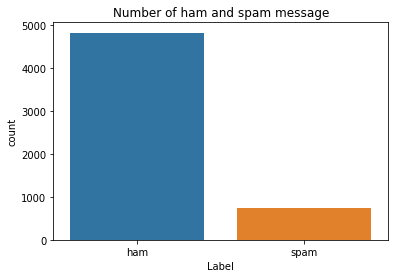

In [44]:
sns.countplot(df.v1)
plt.xlabel('Label')
plt.title('Number of ham and spam message')

In [45]:
X = df.v2
Y = df.v1
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

In [46]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)

In [47]:
# A good first step when working with text is to split it into words.words are calledtoken and the process of splitting text into tokens is called tokenization.
# keras provides the text_to_word _sequence() function that you can use to split text into a list of words...

max_words = 1000
max_len = 150
tok  = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences, maxlen=max_len)


In [48]:
#keras Embedding Layer, keras offers an Embedding layer that can be used for neural networks on text data,It requires that the input data be integer
# encoded, so that each word is represented by unique integer.... It can be used to load a pre-trained word embedding model, a type of transfer learning

def RNN():
  inputs = Input(name='inputs',shape=(max_len))
  layer = Embedding(max_words,50,input_length=max_len)(inputs)
  layer = LSTM(64)(layer)
  layer = Dense(256,name='FC1')(layer)
  layer = Activation('relu')(layer)
  layer = Dropout(0.5)(layer)
  layer = Dense(1,name='out_layer')(layer)
  layer = Activation('sigmoid')(layer)
  model = Model(inputs=inputs,outputs=layer)
  return model


In [49]:
import tensorflow as tf

model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.RMSprop(),metrics=['accuracy'])

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 150)]             0         
_________________________________________________________________
embedding_11 (Embedding)     (None, 150, 50)           50000     
_________________________________________________________________
lstm_11 (LSTM)               (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_22 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257

In [50]:


model.fit(sequences_matrix,Y_train,batch_size=128,epochs=10,
          validation_split=0.3,callbacks=[EarlyStopping(monitor='val_loss',
            min_delta=0.0001)])

Epoch 1/10
26/26 [==============================] - 8s 228ms/step - loss: 0.3610 - accuracy: 0.8630 - val_loss: 0.1637 - val_accuracy: 0.9303


In [51]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [52]:
accr = model.evaluate(test_sequences_matrix,Y_test)

27/27 [==============================] - 1s 21ms/step - loss: 0.2120 - accuracy: 0.9091


In [53]:
print('Test set\n loss: {:0.3f}\n Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
 loss: 0.212
 Accuracy: 0.909


In [60]:
Testing_context = ["yo boy whats up"]

txts = tok.texts_to_sequences(Testing_context)
txts = sequence.pad_sequences(txts, maxlen=max_len)

In [61]:
preds = model.predict(txts)
print(preds)

[[0.00993583]]
